In [29]:
# Import libraries
import pandas as pd
import numpy as np

In [28]:
# Read csv to dataframe
cols =['text1', 'text2']
path = "C:/Users/shric/Desktop/Test Semi/Question.csv"
df = pd.read_csv(path, names = cols, skiprows=1)
df.head()

,text1,text2
0,Describe the major events and consequences of ...,Design a simple database schema for a library ...
1,Write a Python program to find the factorial o...,Write a Python program to find the factorial o...
2,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...
3,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...
4,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...


In [2]:
# Stop word removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Handle missing values by replacing NaN with an empty string
df['text1'] = df['text1'].fillna('')
df['text2'] = df['text2'].fillna('')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text1_nstop'] = df['text1'].apply(lambda x: ' '.join([word for word in \
                              x.split() if word not in (stop)]))
df['text2_nstop'] = df['text2'].apply(lambda x: ' '.join([word for word in \
                              x.split() if word not in (stop)]))
df.head()

,text1,text2,text1_nstop,text2_nstop
0,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...,Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...
1,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...,Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...
2,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...,Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models, hi..."
3,"Analyze the impact of the Renaissance on art, ...",Discuss the advantages and disadvantages of cl...,"Analyze impact Renaissance art, science, cultu...",Discuss advantages disadvantages cloud computi...
4,Describe the major events and consequences of ...,Design a simple database schema for a library ...,Describe major events consequences French Revo...,Design simple database schema library manageme...


In [5]:
# Tokenizing data
nltk.download('punkt')
df["tok_text1"] = df.apply(lambda row: nltk.word_tokenize \
                             (row["text1_nstop"]), axis=1)
df["tok_text2"] = df.apply(lambda row: nltk.word_tokenize \
                             (row["text2_nstop"]), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Convert obtained lists result from tokenizer to string data points
df['tok_text1_str'] = [' '.join(map(str, l)) for l in \
                       df['tok_text1']]
df['tok_text2_str'] = [' '.join(map(str, l)) for l in \
                       df['tok_text2']]
df.head()

,text1,text2,text1_nstop,text2_nstop,tok_text1,tok_text2,tok_text1_str,tok_text2_str
0,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...,Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, causes, consequences, Industrial, Re...","[Write, Python, program, find, factorial, give...",Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...
1,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...,Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, systems, ancien...","[Explain, concept, object-oriented, programmin...",Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...
2,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...,Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models, hi...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models , h..."
3,"Analyze the impact of the Renaissance on art, ...",Discuss the advantages and disadvantages of cl...,"Analyze impact Renaissance art, science, cultu...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantages, disadvantages, cloud, co...","Analyze impact Renaissance art , science , cul...",Discuss advantages disadvantages cloud computi...
4,Describe the major events and consequences of ...,Design a simple database schema for a library ...,Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, events, consequences, French...","[Design, simple, database, schema, library, ma...",Describe major events consequences French Revo...,Design simple database schema library manageme...


In [7]:
# Lemmatized data columns
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
nltk.download('omw-1.4')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['text1_lemmatized'] = df.tok_text1_str.apply(lemmatize_text)
df['text2_lemmatized'] = df.tok_text2_str.apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shric\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# Convert obtained lists result from lemmatizer to string data points
df['text1_lemm_str'] = [' '.join(map(str, l)) for l in \
                         df['text1_lemmatized']]
df['text2_lemm_str'] = [' '.join(map(str, l)) for l in \
                         df['text2_lemmatized']]
df.head()

,text1,text2,text1_nstop,text2_nstop,tok_text1,tok_text2,tok_text1_str,tok_text2_str,text1_lemmatized,text2_lemmatized,text1_lemm_str,text2_lemm_str
0,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...,Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, causes, consequences, Industrial, Re...","[Write, Python, program, find, factorial, give...",Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, cause, consequence, Industrial, Revo...","[Write, Python, program, find, factorial, give...",Discuss cause consequence Industrial Revolutio...,Write Python program find factorial given numb...
1,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...,Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, systems, ancien...","[Explain, concept, object-oriented, programmin...",Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, system, ancient...","[Explain, concept, object-oriented, programmin...",Compare contrast political system ancient Athe...,Explain concept object-oriented programming pr...
2,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...,Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models, hi...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models , h...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network model , hi..."
3,"Analyze the impact of the Renaissance on art, ...",Discuss the advantages and disadvantages of cl...,"Analyze impact Renaissance art, science, cultu...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantages, disadvantages, cloud, co...","Analyze impact Renaissance art , science , cul...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantage, disadvantage, cloud, comp...","Analyze impact Renaissance art , science , cul...",Discuss advantage disadvantage cloud computing...
4,Describe the major events and consequences of ...,Design a simple database schema for a library ...,Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, events, consequences, French...","[Design, simple, database, schema, library, ma...",Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, event, consequence, French, ...","[Design, simple, database, schema, library, ma...",Describe major event consequence French Revolu...,Design simple database schema library manageme...


In [9]:
# Lemmatized data columns
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['text1_lemmatized'] = df.tok_text1_str.apply(lemmatize_text)
df['text2_lemmatized'] = df.tok_text2_str.apply(lemmatize_text)

In [11]:
# Convert obtained lists result from lemmatizer to string data points
df['text1_lemm_str'] = [' '.join(map(str, l)) for l in \
                         df['text1_lemmatized']]
df['text2_lemm_str'] = [' '.join(map(str, l)) for l in \
                         df['text2_lemmatized']]

In [12]:
# Convert lemmatized data to lower case
df['text1_lemm_str'] = df['text1_lemm_str'].str.lower() 
df['text2_lemm_str'] = df['text2_lemm_str'].str.lower()
df.head()

,text1,text2,text1_nstop,text2_nstop,tok_text1,tok_text2,tok_text1_str,tok_text2_str,text1_lemmatized,text2_lemmatized,text1_lemm_str,text2_lemm_str
0,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...,Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, causes, consequences, Industrial, Re...","[Write, Python, program, find, factorial, give...",Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, cause, consequence, Industrial, Revo...","[Write, Python, program, find, factorial, give...",discuss cause consequence industrial revolutio...,write python program find factorial given numb...
1,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...,Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, systems, ancien...","[Explain, concept, object-oriented, programmin...",Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, system, ancient...","[Explain, concept, object-oriented, programmin...",compare contrast political system ancient athe...,explain concept object-oriented programming pr...
2,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...,Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models, hi...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models , h...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",explain significance treaty versailles shaping...,"compare contrast tcp/ip osi network model , hi..."
3,"Analyze the impact of the Renaissance on art, ...",Discuss the advantages and disadvantages of cl...,"Analyze impact Renaissance art, science, cultu...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantages, disadvantages, cloud, co...","Analyze impact Renaissance art , science , cul...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantage, disadvantage, cloud, comp...","analyze impact renaissance art , science , cul...",discuss advantage disadvantage cloud computing...
4,Describe the major events and consequences of ...,Design a simple database schema for a library ...,Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, events, consequences, French...","[Design, simple, database, schema, library, ma...",Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, event, consequence, French, ...","[Design, simple, database, schema, library, ma...",describe major event consequence french revolu...,design simple database schema library manageme...


In [13]:
!pip install transformers

In [14]:
# Import BERT models using SentenceTransformer
from sentence_transformers import SentenceTransformer, util
import numpy as np
model1 = SentenceTransformer('paraphrase-MiniLM-L3-v2')
model2 = SentenceTransformer('all-distilroberta-v1')
model3 = SentenceTransformer('multi-qa-distilbert-cos-v1')

In [16]:
# Create and intialize columns for similarity scores
score = [0.00]*6
pd.Series(score)
df['score1']= score
df['score2']= score
df['score3']= score

In [17]:
# A sentence/text to tensor size by each models
a = df.at[0,'text1_lemm_str']
embda1 = model1.encode(a, convert_to_tensor=True)
embda2 = model2.encode(a, convert_to_tensor=True)
embda3 = model3.encode(a, convert_to_tensor=True)
m1_shape = embda1.shape
m2_shape = embda2.shape
m3_shape = embda3.shape
print("BERT model1 'paraphrase-MiniLM-L3-v2', tensor size    :", m1_shape)
print("BERT model2 'all-distilroberta-v1', tensor size       :", m2_shape)
print("BERT model3 'multi-qa-distilbert-cos-v1', tensor size :", m3_shape)

df.head()

BERT model1 'paraphrase-MiniLM-L3-v2', tensor size    : torch.Size([384])
BERT model2 'all-distilroberta-v1', tensor size       : torch.Size([768])
BERT model3 'multi-qa-distilbert-cos-v1', tensor size : torch.Size([768])


,text1,text2,text1_nstop,text2_nstop,tok_text1,tok_text2,tok_text1_str,tok_text2_str,text1_lemmatized,text2_lemmatized,text1_lemm_str,text2_lemm_str,score1,score2,score3
0,Discuss the causes and consequences of the Ind...,Write a Python program to find the factorial o...,Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, causes, consequences, Industrial, Re...","[Write, Python, program, find, factorial, give...",Discuss causes consequences Industrial Revolut...,Write Python program find factorial given numb...,"[Discuss, cause, consequence, Industrial, Revo...","[Write, Python, program, find, factorial, give...",discuss cause consequence industrial revolutio...,write python program find factorial given numb...,0.0,0.0,0.0
1,Compare and contrast the political systems of ...,Explain the concept of object-oriented program...,Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, systems, ancien...","[Explain, concept, object-oriented, programmin...",Compare contrast political systems ancient Ath...,Explain concept object-oriented programming pr...,"[Compare, contrast, political, system, ancient...","[Explain, concept, object-oriented, programmin...",compare contrast political system ancient athe...,explain concept object-oriented programming pr...,0.0,0.0,0.0
2,Explain the significance of the Treaty of Vers...,Compare and contrast TCP/IP and OSI network mo...,Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models, hi...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",Explain significance Treaty Versailles shaping...,"Compare contrast TCP/IP OSI network models , h...","[Explain, significance, Treaty, Versailles, sh...","[Compare, contrast, TCP/IP, OSI, network, mode...",explain significance treaty versailles shaping...,"compare contrast tcp/ip osi network model , hi...",0.0,0.0,0.0
3,"Analyze the impact of the Renaissance on art, ...",Discuss the advantages and disadvantages of cl...,"Analyze impact Renaissance art, science, cultu...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantages, disadvantages, cloud, co...","Analyze impact Renaissance art , science , cul...",Discuss advantages disadvantages cloud computi...,"[Analyze, impact, Renaissance, art, ,, science...","[Discuss, advantage, disadvantage, cloud, comp...","analyze impact renaissance art , science , cul...",discuss advantage disadvantage cloud computing...,0.0,0.0,0.0
4,Describe the major events and consequences of ...,Design a simple database schema for a library ...,Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, events, consequences, French...","[Design, simple, database, schema, library, ma...",Describe major events consequences French Revo...,Design simple database schema library manageme...,"[Describe, major, event, consequence, French, ...","[Design, simple, database, schema, library, ma...",describe major event consequence french revolu...,design simple database schema library manageme...,0.0,0.0,0.0


In [18]:
# Text similarity scores obtained using 'paraphrase-MiniLM-L3-v2' BERT model
import time
st = time.time()
for i in range(0,6):
  s1= df.at[i, 'text1_lemm_str']
  s2= df.at[i, 'text2_lemm_str']
  embd1 = model1.encode(s1, convert_to_tensor=True)
  embd2 = model1.encode(s2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embd1, embd2)
  df.at[i,'score1'] = cosine_scores.item()
et = time.time()
df.to_csv("C:/Users/shric/Desktop/Test Semi/Question_test.csv")
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.23496580123901367 seconds


In [24]:
# Text similarity scores obtained using BERT model 'all-distilroberta-v1'
for i in range(0,6):
  s1= df.at[i, 'text1_lemm_str']
  s2= df.at[i, 'text2_lemm_str']
  embd1 = model2.encode(s1, convert_to_tensor=True)
  embd2 = model2.encode(s2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embd1, embd2)
  df.at[i,'score2'] = cosine_scores.item()
df.to_csv("C:/Users/shric/Desktop/Test Semi/Question_test2.csv")
et = time.time()

In [25]:
# Text similarity scores obtained using BERT model  'multi-qa-distilbert-cos-v1'
for i in range(0,6):
  s1= df.at[i, 'text1_lemm_str']
  s2= df.at[i, 'text2_lemm_str']
  embd1 = model3.encode(s1, convert_to_tensor=True)
  embd2 = model3.encode(s2, convert_to_tensor=True)
  cosine_scores = util.pytorch_cos_sim(embd1, embd2)
  df.at[i,'score3'] = cosine_scores.item()

In [26]:
# Taking average of the text similarity scores
df['avg_similarity_score'] = df.iloc[:, 12:15].mean(axis=1)
df.head()

# Taking results in seperate dataframe
df_result = df[['text1', 'text2', 'score1', 'score2', 'score3', \
               'avg_similarity_score']]
df_result.rename(columns = {'avg_similarity_score':'avg_simi_score'}, \
                 inplace = True)
df_result.head(10)

df_result.shape

C:\Users\shric\AppData\Local\Temp\ipykernel_18516\1084393342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.rename(columns = {'avg_similarity_score':'avg_simi_score'}, \


(6, 6)

In [27]:
# Plot of text similarity scores
import matplotlib.pyplot as mp

      score1 : BERT model 'paraphrase-MiniLM-L3-v2'
      score2 : BERT model 'all-distilroberta-v1'
      score3 : BERT model 'multi-qa-distilbert-cos-v1'


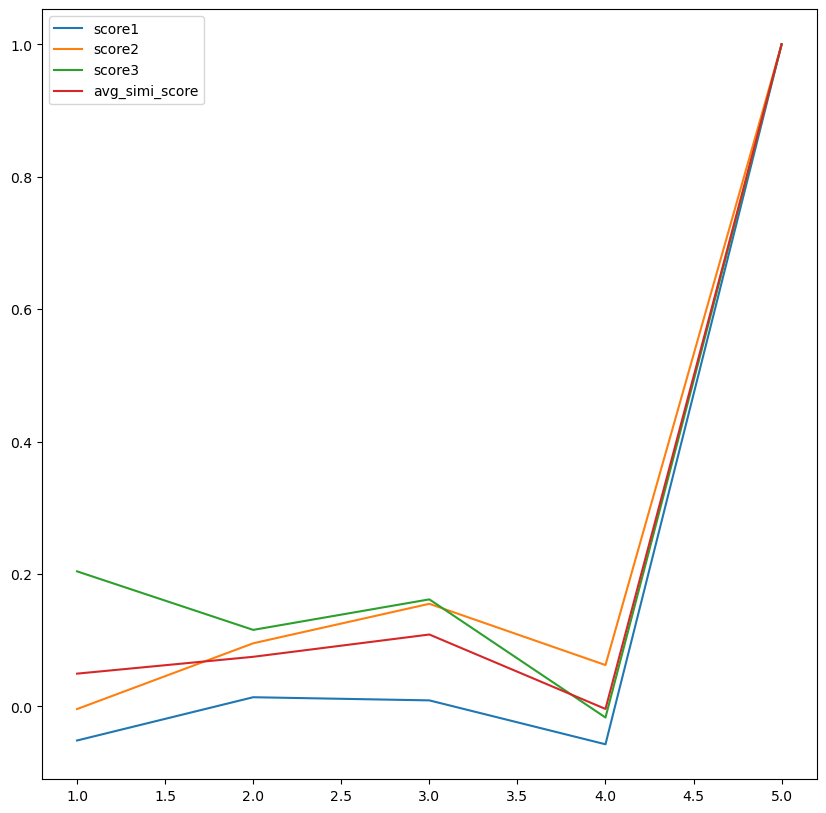

In [28]:
# 25 rows(1 to 6) taken for the plot
df_result.iloc[1:6].plot(y=['score1', 'score2', 'score3', \
                                  'avg_simi_score'],
        kind="line", figsize=(10, 10))
print("      score1 : BERT model 'paraphrase-MiniLM-L3-v2'")
print("      score2 : BERT model 'all-distilroberta-v1'")
print("      score3 : BERT model 'multi-qa-distilbert-cos-v1'")

In [16]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util
import time

# Function to calculate similarity scores between two questions
def calculate_similarity_score(question1, question2):
    # Initialize the BERT models
    model1 = SentenceTransformer('paraphrase-MiniLM-L3-v2')
    model2 = SentenceTransformer('all-distilroberta-v1')
    model3 = SentenceTransformer('multi-qa-distilbert-cos-v1')

    # Encode the two questions
    embd1 = model1.encode(question1, convert_to_tensor=True)
    embd2 = model1.encode(question2, convert_to_tensor=True)
    cosine_score1 = util.pytorch_cos_sim(embd1, embd2).item()

    embd1 = model2.encode(question1, convert_to_tensor=True)
    embd2 = model2.encode(question2, convert_to_tensor=True)
    cosine_score2 = util.pytorch_cos_sim(embd1, embd2).item()

    embd1 = model3.encode(question1, convert_to_tensor=True)
    embd2 = model3.encode(question2, convert_to_tensor=True)
    cosine_score3 = util.pytorch_cos_sim(embd1, embd2).item()

    avg_similarity_score = (cosine_score1 + cosine_score2 + cosine_score3) / 3

    return cosine_score1, cosine_score2, cosine_score3, avg_similarity_score

# Example usage:
question1 = "Discuss the causes and consequences of the Industrial Revolution in the 18th century."
question2 = "Write a Python program to find the factorial of a given number using a recursive function. "
score1, score2, score3, avg_score = calculate_similarity_score(question1, question2)

print("Similarity Score using BERT model 'paraphrase-MiniLM-L3-v2':", score1)
print("Similarity Score using BERT model 'all-distilroberta-v1':", score2)
print("Similarity Score using BERT model 'multi-qa-distilbert-cos-v1':", score3)
print("Average Similarity Score:", avg_score)


Similarity Score using BERT model 'paraphrase-MiniLM-L3-v2': -0.09025591611862183
Similarity Score using BERT model 'all-distilroberta-v1': 0.13339871168136597
Similarity Score using BERT model 'multi-qa-distilbert-cos-v1': -0.022296912968158722
Average Similarity Score: 0.006948627531528473


In [1]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Your list of strings containing content
content_list = [
    "This is the first line of content.",
    "This is the second line of content.",
    "This is the third line of content.",
    "And so on..."
]

# Create a PDF document
pdf_file = "output.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)

# Set font and other attributes
c.setFont("Helvetica", 12)
line_height = 14  # Adjust line height as needed

# Iterate through the list and add the content to the PDF with index numbers
y_position = letter[1] - 72  # Start position (72 points from the top)
for index, content in enumerate(content_list, start=1):
    content_with_index = f"{index}. {content}"
    c.drawString(72, y_position, content_with_index)
    y_position -= line_height

# Save the PDF document
c.save()
